<a href="https://colab.research.google.com/github/saadatialirezam-create/bioinformatics-project/blob/main/HVstrips_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
with open('/content/drive/MyDrive/brain_tumor_lists_resized.pkl', 'rb') as f:
    data = pickle.load(f)

notumor_imgs_resized = data['notumor']
pituitary_imgs_resized = data['pituitary']
meningioma_imgs_resized = data['meningioma']
glioma_imgs_resized = data['glioma']

In [3]:
def hv_stripes_fixed(img, n_stripes, thickness):

    H, W = img.shape[:2]
    out = img.copy()

    fill_value = img.mean()

    if n_stripes * thickness >= H:
        raise ValueError("n_stripes * thickness < 224")

    gap = (H - n_stripes * thickness) // (n_stripes + 1)

    for i in range(n_stripes):
        start = gap * (i + 1) + thickness * i
        end = start + thickness
        if img.ndim == 2:
            out[start:end, :] = fill_value
        else:
            out[start:end, :, :] = fill_value

    for i in range(n_stripes):
        start = gap * (i + 1) + thickness * i
        end = start + thickness
        if img.ndim == 2:
            out[:, start:end] = fill_value
        else:
            out[:, start:end, :] = fill_value

    return out

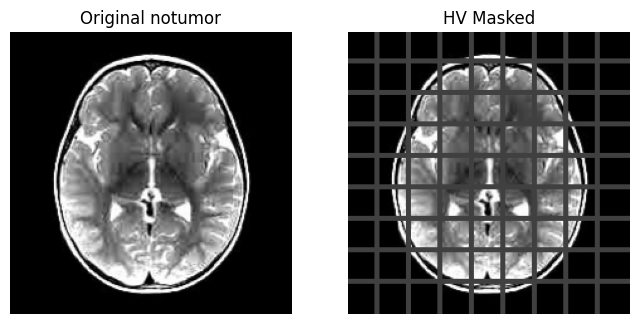

In [8]:
import matplotlib.pyplot as plt

img = notumor_imgs_resized[500]
aug = hv_stripes_fixed(img, n_stripes=8, thickness=4)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img.squeeze(), cmap="gray")
plt.title("Original notumor")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(aug.squeeze(), cmap="gray")
plt.title("HV Masked")
plt.axis("off")
plt.show()

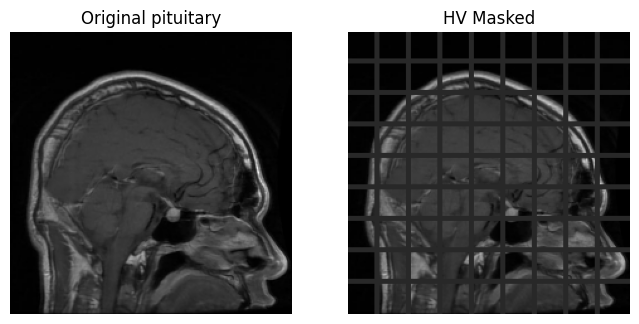

In [9]:
img = pituitary_imgs_resized[500]
aug = hv_stripes_fixed(img, n_stripes=8, thickness=4)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img.squeeze(), cmap="gray")
plt.title("Original pituitary")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(aug.squeeze(), cmap="gray")
plt.title("HV Masked")
plt.axis("off")
plt.show()

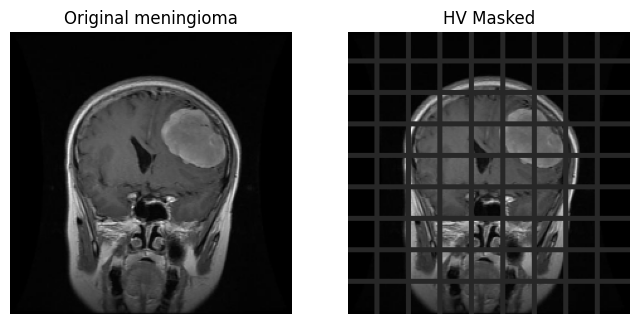

In [10]:
img = meningioma_imgs_resized[500]
aug = hv_stripes_fixed(img, n_stripes=8, thickness=4)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img.squeeze(), cmap="gray")
plt.title("Original meningioma")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(aug.squeeze(), cmap="gray")
plt.title("HV Masked")
plt.axis("off")
plt.show()

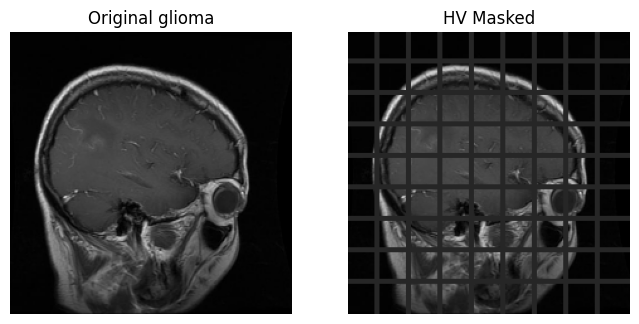

In [11]:
img = glioma_imgs_resized[500]
aug = hv_stripes_fixed(img, n_stripes=8, thickness=4)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img.squeeze(), cmap="gray")
plt.title("Original glioma")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(aug.squeeze(), cmap="gray")
plt.title("HV Masked")
plt.axis("off")
plt.show()

In [12]:
def double_list_with_hv_stripes(img_list, n_stripes, thickness):
    aug_list = []
    for img in img_list:
        aug_list.append(hv_stripes_fixed(img, n_stripes, thickness))
    return img_list + aug_list

In [13]:
n_stripes = 8
thickness = 4

notumor_imgs_resized_2x    = double_list_with_hv_stripes(notumor_imgs_resized, n_stripes, thickness)
pituitary_imgs_resized_2x  = double_list_with_hv_stripes(pituitary_imgs_resized, n_stripes, thickness)
meningioma_imgs_resized_2x = double_list_with_hv_stripes(meningioma_imgs_resized, n_stripes, thickness)
glioma_imgs_resized_2x     = double_list_with_hv_stripes(glioma_imgs_resized, n_stripes, thickness)

print(len(notumor_imgs_resized), "->", len(notumor_imgs_resized_2x))
print(len(pituitary_imgs_resized), "->", len(pituitary_imgs_resized_2x))
print(len(meningioma_imgs_resized), "->", len(meningioma_imgs_resized_2x))
print(len(glioma_imgs_resized), "->", len(glioma_imgs_resized_2x))

1595 -> 3190
1457 -> 2914
1339 -> 2678
1321 -> 2642


In [ ]:
import pickle

data = {
    'notumor': notumor_imgs_resized_2x,
    'pituitary': pituitary_imgs_resized_2x,
    'meningioma': meningioma_imgs_resized_2x,
    'glioma': glioma_imgs_resized_2x
}

with open('/content/drive/MyDrive/brain_tumor_lists_V1.pkl', 'wb') as f:
    pickle.dump(data, f)